In [9]:
#!poetry run pip list | grep -i open

In [10]:
# Activate multi-output in notebook
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [11]:
import asyncio
import os

# For profiling of code
# import memory_profiler
import timeit
import unittest

tc = unittest.TestCase()
import matplotlib as mpl
import pandas as pd
import psutil
import seaborn as sns
from leximpact_aggregates.aggregate import AggregateManager
from leximpact_common_python_libraries.config import Configuration

from leximpact_socio_fisca_simu_etat.plot import quantile_to_df
from leximpact_socio_fisca_simu_etat.schema import (
    AllSimulationResult,
    OneSimulationResult,
    ReformeSocioFiscale,
)
from leximpact_socio_fisca_simu_etat.simu_budget_survey_scenario import (
    compute_all_simulation,
)

# from memory_profiler import memory_usage
# import tracemalloc
# tracemalloc.start(10)

In [12]:
log_run = False
debut_global = timeit.default_timer()

In [13]:
config = Configuration(project_folder="leximpact-socio-fiscal-simu-etat")
aggm = AggregateManager(aggregates_path=config.get("AGREGATS_PATH"))
# aggregates = Aggregate(config.get("AGREGATS_PATH"))
pd.options.display.float_format = "{:,.7f}".format
sns.set(rc={"figure.figsize": (20, 8)})

# Utilisation

In [ ]:
reform = ReformeSocioFiscale(
    base=2022,
    output_variables=["csg_imposable_salaire", "csg_deductible_salaire"],
    quantile_nb=0,
)
resultat = await compute_all_simulation(reform)
resultat

In [7]:
# reform = ReformeSocioFiscale(
#     base=2023,
#     plf=None,
#     amendement={
#         "prelevements_sociaux.contributions_sociales.csg.activite.deductible.taux": {
#             "start": "2023-01-01",
#             "type": "parameter",
#             "value": 0.07,
#         }
#     },
#     output_variables=["rfr", "csg_deductible_salaire", "csg_imposable_salaire"],
#     quantile_nb=10,
#     quantile_entity="foyer_fiscal",
#     quantile_base_variable=["rfr"],
#     quantile_compare_variables=["csg_deductible_salaire", "csg_imposable_salaire"],
# )
# print(reform)
# montant_csg_etat = await compute_all_simulation(reform)
# montant_csg_etat
# print(
#     "csg_deductible_salaire+csg_imposable_salaire du 5° décile",
#     montant_csg_etat.result["base"].quantiles[4][
#         "csg_deductible_salaire+csg_imposable_salaire"
#     ],
# )

## Sans réforme

In [8]:
reform_simple = ReformeSocioFiscale(
    base=2021,
    output_variables=["csg_imposable_salaire"],
    quantile_nb=0,
)

### On lance la simulation

In [9]:
# Add to leaky code within python_script_being_profiled.py
# ATTENTION : très long
# from pympler import muppy, summary
# all_objects = muppy.get_objects()
# sum1 = summary.summarize(all_objects)# Prints out a summary of the large objects
# summary.print_(sum1)# Get references to certain types of objects such as dataframe
# dataframes = [ao for ao in all_objects if isinstance(ao, pd.DataFrame)]

# for d in dataframes:
#     print(d.columns.values)
#     print(len(d))

#                                                               types |   # objects |   total size
# =================================================================== | =========== | ============
#                                         pandas.core.frame.DataFrame |           7 |    203.64 MB
#                                                       numpy.ndarray |         132 |    144.35 MB
#                                                                dict |      206599 |     44.54 MB
#                                                                 str |      235228 |     34.76 MB
#                                                                type |       12876 |     15.06 MB
#                                           pandas.core.series.Series |           5 |     14.12 MB

In [10]:
def print_memory():
    process = psutil.Process(os.getpid())
    mi = process.memory_info()
    print(
        f"rss={mi.rss//1_000_000:,}M, vms={mi.vms//1_000_000:,}M, shared={mi.shared//1_000_000:,}M"
    )

In [ ]:
print_memory()

In [ ]:
resultat_simple = await compute_all_simulation(reform_simple)
# resultat_simple = asyncio.run(compute_all_simulation(reform_simple))

# @memory_profiler.profile
# async def run_memory_test():
#     return compute_all_simulation(reform_simple)

# def run_mem_test():
#     return  asyncio.run(run_memory_test())

# #mem_usage = memory_profiler.memory_usage((compute_all_simulation, (reform_simple,)))
# mem_usage = await run_memory_test()
# print("Memory usage (in chunks of .1 seconds): %s" % mem_usage)
# # print("Maximum memory usage: %s" % max(mem_usage))

In [ ]:
resultat_simple

In [16]:
tc.assertGreater(
    resultat_simple.result["base"].state_budget["csg_imposable_salaire"],
    -22_000_000_000,
)
tc.assertLess(
    resultat_simple.result["base"].state_budget["csg_imposable_salaire"],
    -18_000_000_000,
)

In [ ]:
print_memory()

In [18]:
# Add to leaky code within python_script_being_profiled.py
# ATTENTION : très long
# from pympler import muppy, summary
# all_objects = muppy.get_objects()
# sum1 = summary.summarize(all_objects)# Prints out a summary of the large objects
# summary.print_(sum1)

# Get references to certain types of objects such as dataframe
# dataframes = [ao for ao in all_objects if isinstance(ao, pd.DataFrame)]

# for d in dataframes:
#     print(d.columns.values)
#     print(len(d))

# =================================================================== | =========== | ============
#                                                       numpy.ndarray |        1033 |      1.08 GB
#                                         pandas.core.frame.DataFrame |          10 |    431.79 MB
#                                           pandas.core.series.Series |         165 |    327.34 MB
#                                                                dict |      268526 |     56.66 MB

In [ ]:
resultat_simple.result["base"].state_budget["csg_imposable_salaire"]
del resultat_simple
print_memory()

In [ ]:
# aggm.load_aggregate(
#     year=config.get("YEAR_ERFS"), variable="csg_imposable_salaire", dataset="ERFS", "factor_to_2022"
# )

## Réforme simple

In [24]:
reform_simple = ReformeSocioFiscale(
    base=2022,
    plf=2023,
    amendement={
        "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": {
            "scale": [
                {"rate": {"value": 0}, "threshold": {"value": 0.00}},
            ],
            "start": "2023-01-01",
            "type": "scale",
        },
        "prelevements_sociaux.contributions_sociales.csg.activite.deductible.taux": {
            "scale": [
                {"rate": {"value": 0}, "threshold": {"value": 0.00}},
            ],
            "start": "2023-01-01",
            "type": "scale",
        },
    },
    output_variables=[
        "csg_imposable_salaire",
        "csg_deductible_salaire",
    ],
    quantile_nb=0,
)

In [25]:
# from IPython.display import JSON

# with open(config.get("PLF")) as json_file:
#     changement_plf = json.load(json_file)
# JSON(changement_plf)

### On lance la simulation

In [ ]:
# %%time
resultat_simple = await compute_all_simulation(reform_simple)

In [ ]:
resultat_simple

In [ ]:
tc.assertEqual(
    resultat_simple.result["amendement"].state_budget["csg_imposable_salaire"], 0
)

In [ ]:
csg_salaire_avant = (
    resultat_simple.result["base"].state_budget["csg_imposable_salaire"]
    + resultat_simple.result["base"].state_budget["csg_deductible_salaire"]
)
csg_salaire_plf = (
    resultat_simple.result["plf"].state_budget["csg_imposable_salaire"]
    + resultat_simple.result["plf"].state_budget["csg_deductible_salaire"]
)
csg_salaire_amendement = (
    resultat_simple.result["amendement"].state_budget["csg_imposable_salaire"]
    + resultat_simple.result["amendement"].state_budget["csg_deductible_salaire"]
)
print(f'Montant "avant" de la CSG prélevée sur les salaires {csg_salaire_avant:,.0f} €')
print(f'Montant "plf" de la CSG prélevée sur les salaires {csg_salaire_plf:,.0f} €')
print(
    f'Montant "amendement" de la CSG prélevée sur les salaires {csg_salaire_amendement:,.0f} €'
)

In [ ]:
resultat_simple.errors

## CSG Salaire Quantile

In [37]:
# "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": 0.05
reform_quantile = ReformeSocioFiscale(
    base=2022,
    plf=2023,
    amendement={
        "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": {
            "scale": [
                {"rate": {"value": 0}, "threshold": {"value": 0.015}},
            ],
            "start": "2023-01-01",
            "type": "scale",
        }
    },
    output_variables=[
        "csg_salaire",
    ],
    quantile_nb=10,
    quantile_base_variable=["rfr_par_part"],
    quantile_compare_variables=["csg_salaire", "rfr"],
)

In [ ]:
reform_quantile.json()

### On lance la simulation

In [ ]:
# %%time
print_memory()
resultat_quantile = await compute_all_simulation(reform_quantile)
print_memory()

In [ ]:
resultat_quantile.errors

In [41]:
# def print_total_csg(resultat_quantile):
#     print(
#         f'Montant de la CSG sur les salaires avant : {resultat_quantile.result["base"].state_budget["csg_imposable_salaire"]+resultat_quantile.result["base"].state_budget["csg_deductible_salaire"]:,.0f} € csg_imposable_salaire = {resultat_quantile.result["base"].state_budget["csg_imposable_salaire"]} csg_deductible_salaire = {resultat_quantile.result["base"].state_budget["csg_deductible_salaire"]}'
#     )
#     print(
#         f'Montant de la CSG sur les salaires avec PLF : {resultat_quantile.result["plf"].state_budget["csg_imposable_salaire"]+resultat_quantile.result["plf"].state_budget["csg_deductible_salaire"]:,.0f} € csg_imposable_salaire = {resultat_quantile.result["plf"].state_budget["csg_imposable_salaire"]} csg_deductible_salaire = {resultat_quantile.result["plf"].state_budget["csg_deductible_salaire"]}'
#     )
#     print(
#         f'Montant de la CSG sur les salaires amendement : {resultat_quantile.result["amendement"].state_budget["csg_imposable_salaire"]+resultat_quantile.result["amendement"].state_budget["csg_deductible_salaire"]:,.0f} € csg_imposable_salaire = {resultat_quantile.result["amendement"].state_budget["csg_imposable_salaire"]} csg_deductible_salaire = {resultat_quantile.result["amendement"].state_budget["csg_deductible_salaire"]}'
#     )

In [50]:
# print_total_csg(resultat_quantile)

In [ ]:
resultat_quantile.result

In [ ]:
df = quantile_to_df(resultat_quantile, "csg_salaire")
df

In [ ]:
df["count"].sum()

In [ ]:
83812002352 - 83812003840

In [ ]:
# On vérifie que la somme des quantiles est bien égale à la somme renvoyée par le résultat
tc.assertAlmostEqual(
    int(df.plf.sum()),
    int(resultat_quantile.result["plf"].state_budget["csg_salaire"]),
    delta=2500,
)

In [ ]:
df.plf.sum()

### Graphique

In [59]:
def plot_quantile(df: pd.DataFrame(), x, y, title: str, xlabel: str, ylabel: str):
    ax = df.plot.bar(x=x, y=y)
    _ = ax.set_title(
        title,
        size=20,
    )
    _ = ax.set_xlabel(xlabel)
    _ = ax.set_ylabel(ylabel)
    _ = ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f} €"))
    _ = ax.set_xticklabels(
        [f"{float(l.get_text()):,.0f} €" for l in ax.get_xticklabels()],
        rotation=90,
        size=15,
    )

In [ ]:
plot_quantile(
    df,
    x="rfr_min",
    y=["base", "plf", "amendement"],
    title="Contribution total à la CSG des salariés par quantile d'assiette de CSG",
    xlabel="Quantile d'assiette de CSG",
    ylabel="Montant de la CSG sur les salaires",
)

In [ ]:
resultat_quantile.errors

## CSG Retraite Quantile

In [ ]:
# "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": 0.05
reform_quantile_csg_retraite = ReformeSocioFiscale(
    base=2021,
    plf=2022,
    amendement={
        "prelevements_sociaux.contributions_sociales.csg.remplacement.pensions_retraite_invalidite.imposable.taux_plein": 0.01,
    },
    output_variables=[
        "retraite_brute",
        "csg_imposable_retraite",
        "csg_deductible_retraite",
    ],
    quantile_nb=10,
    quantile_base_variable=["retraite_brute"],
    quantile_compare_variables=[
        "csg_imposable_retraite",
        "csg_deductible_retraite",
    ],
)

In [ ]:
def print_total_csg_retraite(resultat_quantile):
    print(
        f'Montant de la CSG sur les retraites avant : {resultat_quantile.result["base"].state_budget["csg_imposable_retraite"]+resultat_quantile.result["base"].state_budget["csg_deductible_retraite"]:,.0f} € csg_imposable_retraite = {resultat_quantile.result["base"].state_budget["csg_imposable_retraite"]} csg_deductible_retraite = {resultat_quantile.result["base"].state_budget["csg_deductible_retraite"]}'
    )
    print(
        f'Montant de la CSG sur les retraites avec PLF : {resultat_quantile.result["plf"].state_budget["csg_imposable_retraite"]+resultat_quantile.result["plf"].state_budget["csg_deductible_retraite"]:,.0f} € csg_imposable_retraite = {resultat_quantile.result["plf"].state_budget["csg_imposable_retraite"]} csg_deductible_retraite = {resultat_quantile.result["plf"].state_budget["csg_deductible_retraite"]}'
    )
    print(
        f'Montant de la CSG sur les retraites amendement : {resultat_quantile.result["amendement"].state_budget["csg_imposable_retraite"]+resultat_quantile.result["amendement"].state_budget["csg_deductible_retraite"]:,.0f} € csg_imposable_retraite = {resultat_quantile.result["amendement"].state_budget["csg_imposable_retraite"]} csg_deductible_retraite = {resultat_quantile.result["amendement"].state_budget["csg_deductible_retraite"]}'
    )

### On lance la simulation

In [ ]:
%%time
print_memory()
resultat_quantile_csg_retraite = await compute_all_simulation(
    reform_quantile_csg_retraite
)
print_memory()

In [ ]:
# resultat_quantile_csg_retraite.json()

In [ ]:
print_total_csg_retraite(resultat_quantile_csg_retraite)

In [ ]:
# variable = "csg_imposable_retraite+csg_deductible_retraite"
# df_base = pd.DataFrame(resultat_quantile.result["base"].quantiles)
# df_plf = pd.DataFrame(resultat_quantile.result["plf"].quantiles)
# df_amendement = pd.DataFrame(resultat_quantile.result["amendement"].quantiles)
# df_base["plf"] = df_plf[variable]
# df_base["amendement"] = df_amendement[variable]
# df_base["avant"] = df_base[variable]
# df = df_base
df = quantile_to_df(
    resultat_quantile_csg_retraite, "csg_imposable_retraite+csg_deductible_retraite"
)

df

In [ ]:
df["count"].sum()

In [ ]:
# On vérifie que la somme des quantiles est bien égale à la somme des
tc.assertAlmostEqual(
    int(df.plf.sum()),
    int(
        resultat_quantile_csg_retraite.result["plf"].state_budget[
            "csg_imposable_retraite"
        ]
        + resultat_quantile_csg_retraite.result["plf"].state_budget[
            "csg_deductible_retraite"
        ]
    ),
    delta=1500,
)

In [ ]:
df.plf.sum()

### Graphique

In [ ]:
plot_quantile(
    df,
    x="retraite_brute",
    y=["avant", "plf", "amendement"],
    title="Contribution totale à la CSG des retraités par quantile de Retraite brute",
    xlabel="Quantiles de retraite brute",
    ylabel="Montant de la CSG sur les retraites",
)

In [ ]:
resultat_quantile_csg_retraite.errors

In [ ]:
# Tests
tc.assertLess(
    df["csg_imposable_retraite+csg_deductible_retraite"].sum(), -20_000_000_000
)
tc.assertGreater(
    df["csg_imposable_retraite+csg_deductible_retraite"].sum(), -33_000_000_000
)

## CRDS Salaire Quantile

In [ ]:
# "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": 0.05
reform_quantile_crds = ReformeSocioFiscale(
    base=2021,
    plf=2022,
    amendement={
        "prelevements_sociaux.contributions_sociales.crds.activite.taux": 0.015,
    },
    output_variables=[
        "assiette_csg_abattue",
        "crds_salaire",
    ],
    quantile_nb=20,
    quantile_base_variable=["assiette_csg_abattue"],
    quantile_compare_variables=[
        "crds_salaire",
    ],
)

In [ ]:
reform_quantile_crds.json()

### On lance la simulation

In [ ]:
%%time
resultat_quantile_crds = await compute_all_simulation(reform_quantile_crds)
# Avec MemoryConfig on met 39s pour le calcul, sans on met 38s, l'augmentation du temps de calcul n'est donc pas à cause de MemoryConfig, est-ce à cause de tracemalloc ?

In [ ]:
# resultat_quantile.json()

In [ ]:
print(
    f'Montant de la CRDS sur les salaires avant : {resultat_quantile_crds.result["base"].state_budget["crds_salaire"]:,.0f} €'
)
print(
    f'Montant de la CRDS sur les salaires avec PLF : {resultat_quantile_crds.result["plf"].state_budget["crds_salaire"]:,.0f} €'
)
print(
    f'Montant de la CRDS sur les salaires amendement : {resultat_quantile_crds.result["amendement"].state_budget["crds_salaire"]:,.0f} €'
)

In [ ]:
variable = "crds_salaire_sum"
df_base = pd.DataFrame(resultat_quantile_crds.result["base"].quantiles)
df_plf = pd.DataFrame(resultat_quantile_crds.result["plf"].quantiles)
df_amendement = pd.DataFrame(resultat_quantile_crds.result["amendement"].quantiles)
df_base["plf"] = df_plf[variable]
df_base["amendement"] = df_amendement[variable]
df_base["avant"] = df_base[variable]
df = df_base

# df

### Graphique

In [ ]:
ax = df.plot.bar(x="assiette_csg_abattue", y=["avant", "plf", "amendement"])
_ = ax.set_title(
    "Contribution total à la CRDS salaire par quantile de assiette de CSG",
    size=20,
)
_ = ax.set_xlabel("Quantiles d'assiettes de CSG")
_ = ax.set_ylabel("Montant de la CRDS")
_ = ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f} €"))
# ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f} €'))
_ = ax.set_xticklabels(
    [f"{float(l.get_text()):,.0f} €" for l in ax.get_xticklabels()],
    rotation=90,
    size=15,
)
# _ = ax.bar_label(ax.containers[0])

In [ ]:
resultat_quantile_crds.errors

In [ ]:
# Tests
tc.assertGreater(
    resultat_quantile_crds.result["base"].state_budget["crds_salaire"], -5_000_000_000
)
tc.assertLess(
    resultat_quantile_crds.result["base"].state_budget["crds_salaire"], -2_000_000_000
)
tc.assertGreater(
    resultat_quantile_crds.result["amendement"].state_budget["crds_salaire"],
    -13_500_000_000,
)
tc.assertLess(
    resultat_quantile_crds.result["amendement"].state_budget["crds_salaire"],
    -11_000_000_000,
)

## Debug Front

In [ ]:
from leximpact_common_python_libraries.cache import Cache

cache = Cache()
cache.clear_cache()

In [ ]:
import json

# json_str = '{"base":2021,"output_variables":["assiette_csg_abattue","assiette_csg_non_abattue","csg_imposable_salaire","csg_deductible_salaire","csg_imposable_retraite","csg_deductible_retraite"],"quantile_nb":10,"quantile_base_variable":["assiette_csg_abattue","assiette_csg_non_abattue"],"quantile_compare_variables":["csg_imposable_salaire","csg_deductible_salaire","csg_imposable_retraite","csg_deductible_retraite"],"plf":2022}'
json_str = '{"base":2020,"output_variables":["assiette_csg_abattue","assiette_csg_non_abattue","csg_imposable_salaire","csg_deductible_salaire"],"quantile_nb":10,"quantile_base_variable":["assiette_csg_abattue","assiette_csg_non_abattue"],"quantile_compare_variables":["csg_imposable_salaire","csg_deductible_salaire"],"amendement":{"prelevements_sociaux.contributions_sociales.csg.activite.deductible.taux":{"start":"2020-01-01","type":"parameter","value":0.68},"prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux":{"start":"2020-01-01","type":"parameter","value":0.24}}}'

reform_retraite = ReformeSocioFiscale.parse_obj(json.loads(json_str))
resultat_retraite = await compute_all_simulation(reform_retraite)

In [ ]:
sum = 0
resultat_retraite.result["amendement"].state_budget.items()
for k, v in resultat_retraite.result["amendement"].state_budget.items():
    sum += v if "csg_imposable_salaire" in k or "csg_deductible_salaire" in k else 0
print(f"Somme {sum/1e9:,.0f} milliards.")

## Réforme sous forme de barème

In [ ]:
_ = {
    "base": 2021,
    "output_variables": [
        "assiette_csg_abattue",
        "csg_imposable_salaire",
        "csg_deductible_salaire",
    ],
    "quantile_nb": 10,
    "quantile_base_variable": ["assiette_csg_abattue"],
    "quantile_compare_variables": ["csg_imposable_salaire", "csg_deductible_salaire"],
    "amendement": {
        "prelevements_sociaux.contributions_sociales.csg.activite.deductible.taux": {
            "start": "2022-01-01",
            "type": "parameter",
            "value": 0.068,
        },
        "prelevements_sociaux.contributions_sociales.csg.activite.imposable.abattement": {
            "scale": [
                {"rate": {"value": 0.0175}, "threshold": {"value": 0}},
                {"rate": {"value": 0}, "threshold": {"value": 15}},
            ],
            "start": "2022-01-01",
            "type": "scale",
        },
    },
    "plf": 2022,
}

In [ ]:
reform_bareme = ReformeSocioFiscale(
    base=2021,
    plf=2022,
    amendement={
        "prelevements_sociaux.contributions_sociales.csg.activite.deductible.taux": {
            "start": "2022-01-01",
            "type": "parameter",
            "value": 0.018,
        },
        "prelevements_sociaux.contributions_sociales.csg.activite.imposable.abattement": {
            "scale": [
                {"rate": {"value": 0.9}, "threshold": {"value": 0}},
                {"rate": {"value": 0}, "threshold": {"value": 15}},
            ],
            "start": "2022-01-01",
            "type": "scale",
        },
    },
    output_variables=[
        "assiette_csg_abattue",
        "csg_imposable_salaire",
        "csg_deductible_salaire",
    ],
    quantile_nb=10,
    quantile_base_variable=["assiette_csg_abattue"],
    quantile_compare_variables=["csg_imposable_salaire", "csg_deductible_salaire"],
)

In [ ]:
reform_bareme

In [ ]:
json_str = reform_bareme.json()

In [ ]:
import json

ReformeSocioFiscale.parse_obj(json.loads(json_str))

### On lance la simulation

In [ ]:
log_run = True

In [ ]:
%%time
if log_run == True:
    # cache.clear_cache()
    resultat_bareme = await compute_all_simulation(reform_bareme)

In [ ]:
if log_run == True:
    print_total_csg(resultat_bareme)

In [ ]:
# resultat_bareme

In [ ]:
if log_run == True:
    variable = "csg_imposable_salaire+csg_deductible_salaire"
    df_base = pd.DataFrame(resultat_bareme.result["base"].quantiles)
    df_plf = pd.DataFrame(resultat_bareme.result["plf"].quantiles)
    df_amendement = pd.DataFrame(resultat_bareme.result["amendement"].quantiles)
    df_base["plf"] = df_plf[variable]
    df_base["amendement"] = df_amendement[variable]
    df_base["avant"] = df_base[variable]
    df = df_base

    df

In [ ]:
# On vérifie que la somme des quantiles est bien égale au total
if log_run == True:
    tc.assertAlmostEqual(
        int(df.plf.sum()),
        int(
            resultat_bareme.result["plf"].state_budget["csg_imposable_salaire"]
            + resultat_bareme.result["plf"].state_budget["csg_deductible_salaire"]
        ),
        delta=2500,
    )

In [ ]:
if log_run == True:
    df.plf.sum()

### Graphique

In [ ]:
if log_run == True:
    ax = df.plot.bar(x="assiette_csg_abattue", y=["avant", "plf", "amendement"])
    _ = ax.set_title(
        "Contribution total à la CSG des salariés par quantile d'assiette de CSG",
        size=20,
    )
    _ = ax.set_xlabel("Quantile d'assiette de CSG")
    _ = ax.set_ylabel("Montant de la CSG sur les salaires")
    _ = ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f} €"))
    _ = ax.set_xticklabels(
        [f"{float(l.get_text()):,.0f} €" for l in ax.get_xticklabels()],
        rotation=90,
        size=15,
    )

## Impôt sur le revenu

In [ ]:
# "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": 0.05
reform_quantile_rfr = ReformeSocioFiscale(
    base=2023,
    amendement={
        "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": 0.05
    },
    output_variables=["rfr", "irpp"],
    quantile_nb=10,
    quantile_base_variable=["rfr"],
    quantile_compare_variables=[
        "irpp",
    ],
)

In [ ]:
reform_quantile_rfr.json()

### On lance la simulation

In [ ]:
%%time
resultat_quantile_rfr = await compute_all_simulation(reform_quantile_rfr)

In [ ]:
resultat_quantile_rfr.result["base"].state_budget

Le 3 janvier 2023 avec la base `base_ERFS2018_POTE2019_ind_2019_20230103-101219.h5` et OF 134 avec la réforme PLF2023:
- 'rfr': 1194124771328.0
- 'irpp': -92298444800.0 => Pas normal !

Le 3 janvier 2023 avec la base `base_ERFS2018_POTE2019_ind_2022_20221220-101745.h5` et OF 134 avec la réforme PLF2023:
- 'rfr': 1202288328704.0
- 'irpp': -86887587840.0

Le 23 décembre, avec la base Le 21 décembre avec base_ERFS2018_POTE2019_ind_2022_20221220-101745.h5 :
- 'rfr': 1101003620352.0
- 'irpp': Montant en sortie OF pour 2023 pour la somme de ['irpp'] : -120,716,591,104, montant attendu : 86,887,586,871

Le 21 décembre avec base_ERFS2018_POTE2019_ind_2022_20221220-101745-bidouillage.h5
- 'rfr': 1162313990144.0, => C'est réaliste.
- 'irpp': -81459757056.0} => C'est réaliste aussi même si on devrait avoir un peu plus.

Le 21 décembre avec base_ERFS2018_POTE2019_ind_2022_20221220-101745.h5
- 'rfr': 1456489103360.0
- 'irpp': -76771262464.0}

Le 16 décembre 2022 avec base_ERFS2018_POTE2019_ind_2022_20221215-211319.h5 :
- RFR : 337_665_196_032 => C'est complètement faux !
- IRPP : 87_574_560_768 => C'est étrangement quasiment juste !
=> Le problème était la construction du dataframe foyer avec le groupby


**A noter : OpenFisca ne tient pas compte du RFR pour calculer l'IRPP : un RFR juste ne veut pas dire un IRPP juste !**

In [ ]:
# resultat_quantile_rfr

### Graphique

In [ ]:
df = quantile_to_df(resultat_quantile_rfr, "irpp_sum")
df

Répartition de l'impôt sur le revenu selon le décile de revenus en 2021 d'après le [rapport du Sénat](http://www.senat.fr/rap/l22-115-21/l22-115-212.html) :

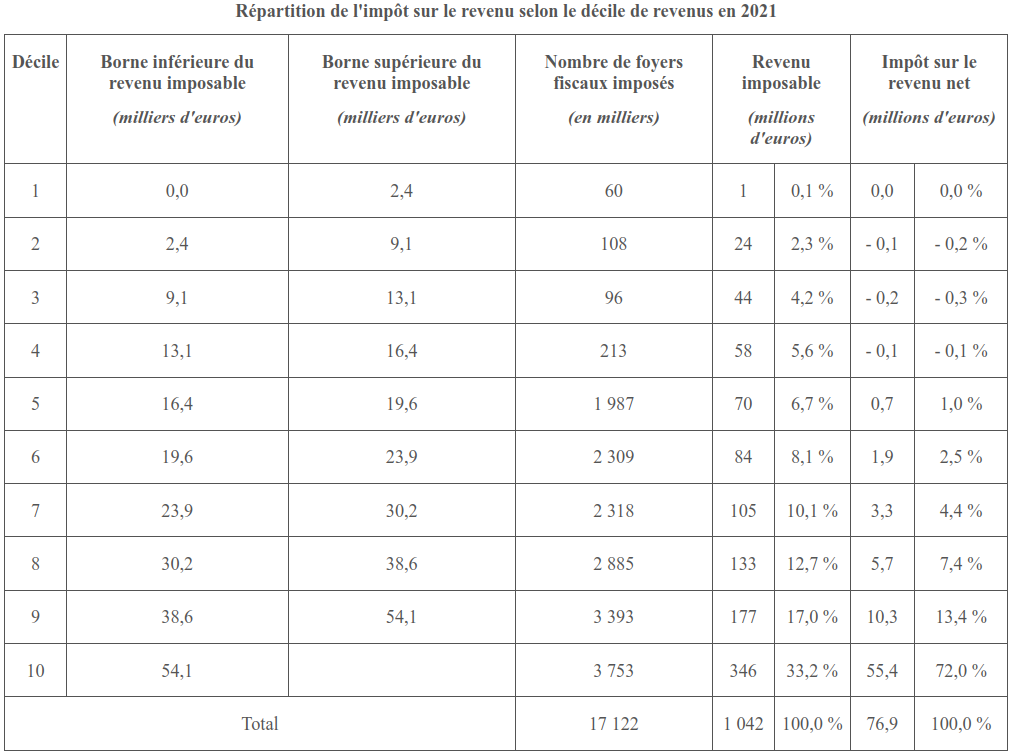


Capture d'écran du 3 janvier 2023, de la production avec la base du PLF2022 ("/mnt/data-out/leximpact/leximpact-server/data_erfs_2018_aged_to_2021-PROD-PLF2022.h5")

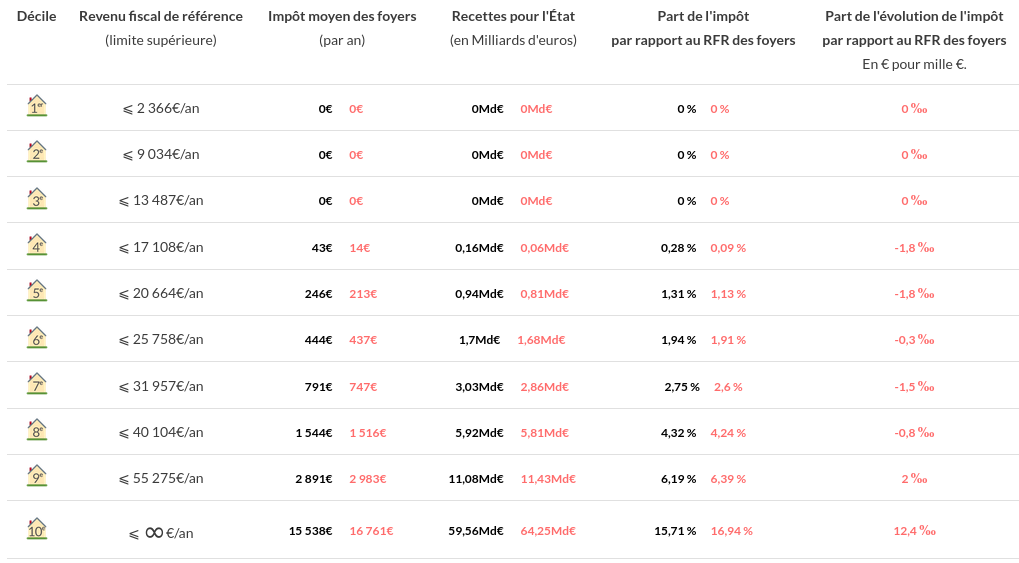

Pipeline PLF2023 en juin 2023.
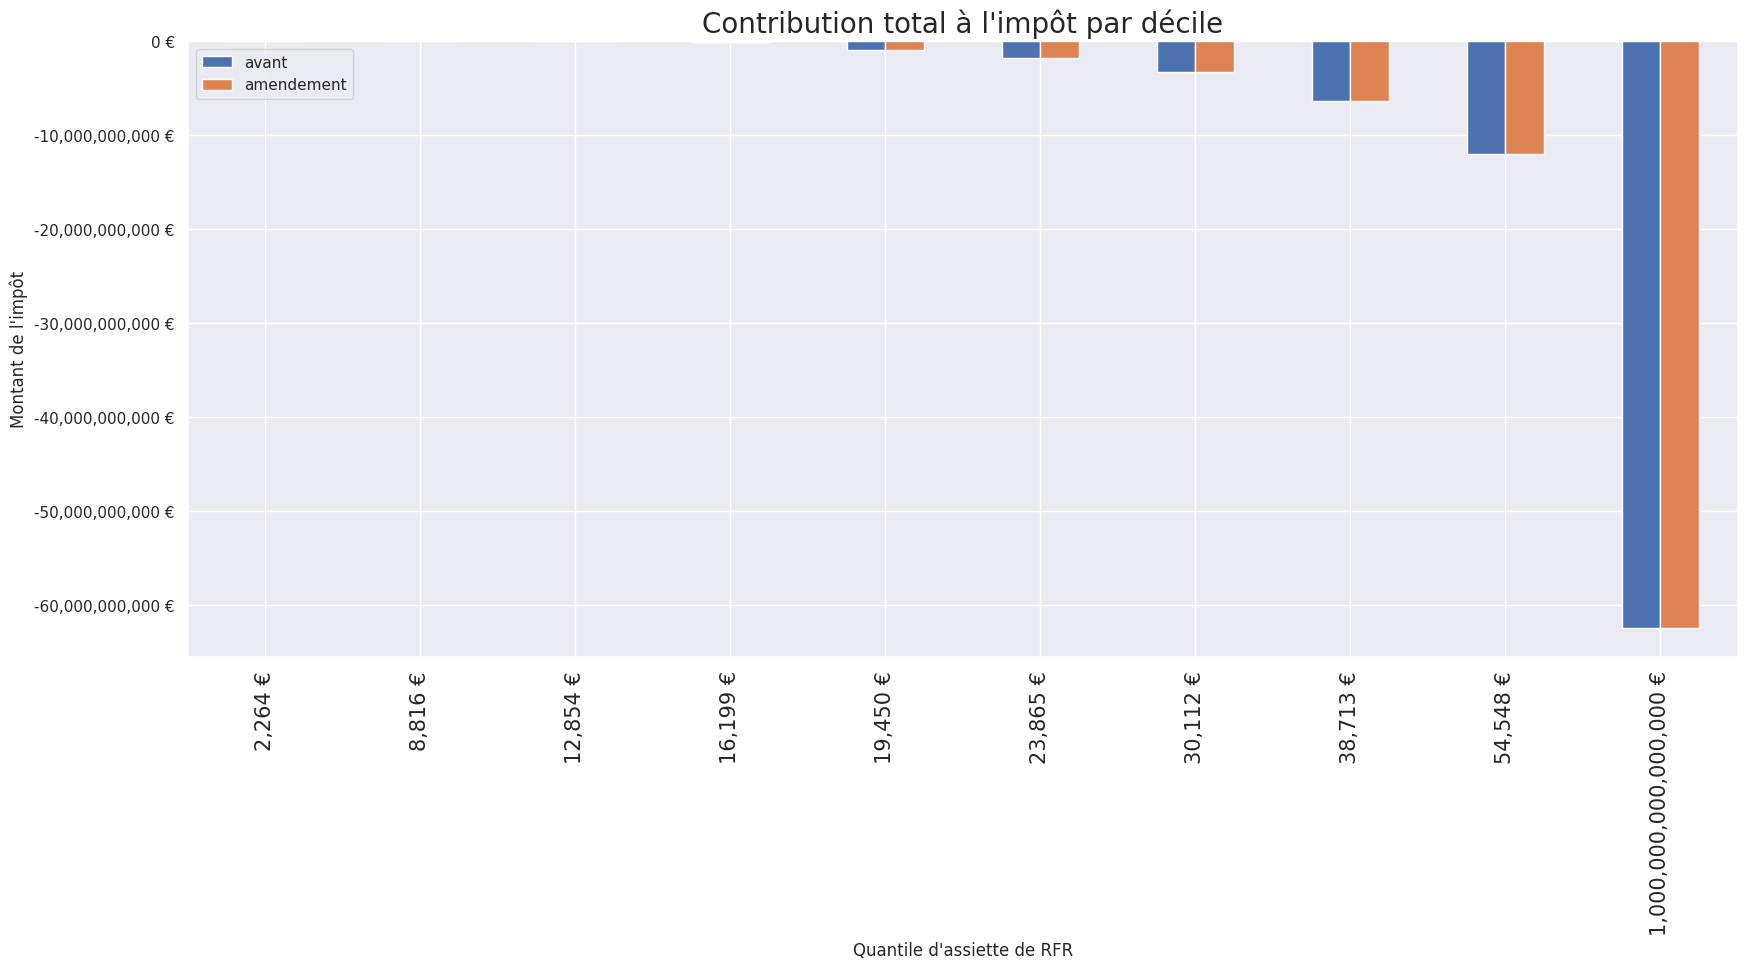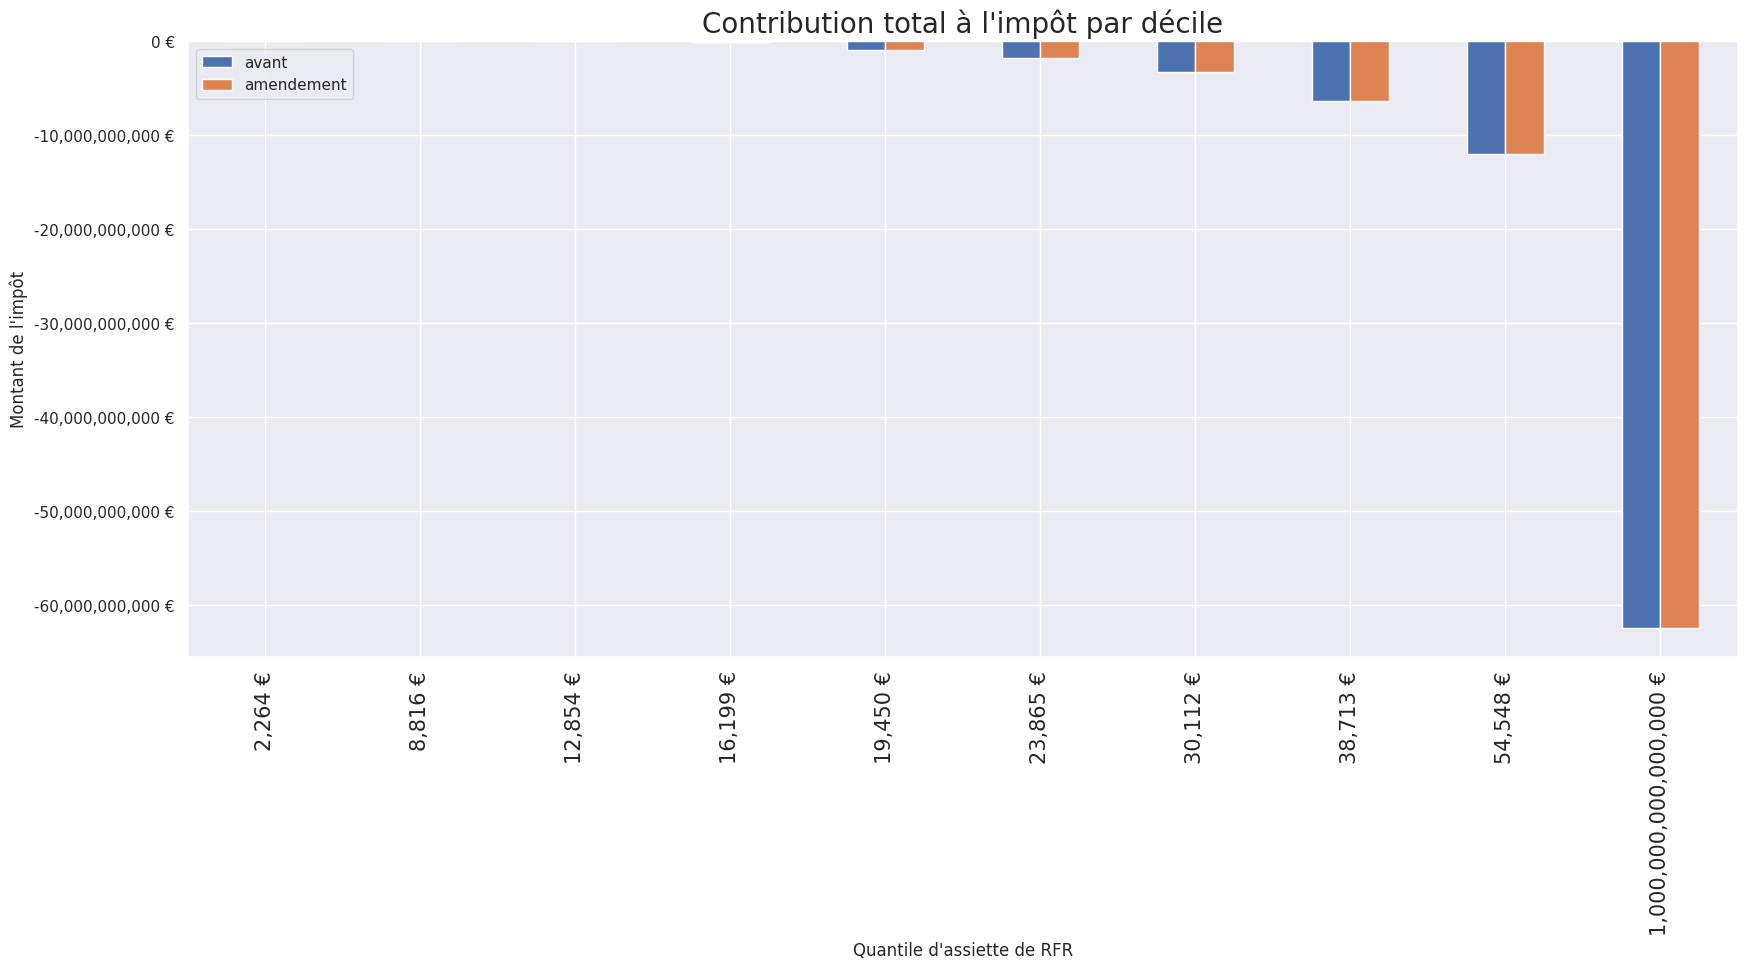


Pipeline PLF2024

In [ ]:
plot_quantile(
    df,
    x="rfr",
    y=["avant", "amendement"],
    title="Contribution total à l'impôt par décile",
    xlabel="Quantile d'assiette de RFR",
    ylabel="Montant de l'impôt",
)

## Test gestion d'erreur

In [ ]:
# reform_error = ReformeSocioFiscale(
#     base=2021,
#     plf=2021,
#     amendement={
#         "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": 0.064,
#         "prelevements_sociaux.contributions_sociales.csg.activite.deductible.taux": 0.028,
#         "prelevements_sociaux.contributions_sociales.csg.activite.deductible.abattement": {
#             "scale": [
#                 {"rate": {"value": 0.5}, "threshold": {"value": 0}},
#                 {"rate": {"value": 0}, "threshold": {"value": 4}},
#             ],
#             "start": "2021-01-01",
#             "type": "scale",
#         },
#     },
#     output_variables=[
#         "rfr",
#         "csg",
#         "csg_imposable_salaire",
#         "assiette_csg_abattue",
#     ],
#     quantile_nb=10,
#     quantile_base_variable=["assiette_csg_abattue"],
#     quantile_compare_variables=["rfr", "csg", "csg_imposable_salaire"],
# )

### On lance la simulation

In [ ]:
# %%time
# resultat_error = await compute_all_simulation(reform_error)

In [ ]:
# resultat_error

In [ ]:
# tc.assertIsNone(resultat_error.result)
# tc.assertTrue(
#     "We can only compute quantiles on variables of same entity"
#     in resultat_error.errors[0]
# )

## On prépare une réforme plus complexe

```python
all_csg = ['csg', 'csg_imposable_salaire', 'csg_deductible_salaire','csg_imposable_chomage','csg_deductible_chomage','csg_imposable_retraite', 'csg_deductible_retraite','csg_deductible_non_salarie', 'csg_imposable_non_salarie', 'csg_revenus_capital']
```

In [ ]:
reform = ReformeSocioFiscale(
    base=2018,
    plf=2018,
    amendement={
        "prelevements_sociaux.contributions_sociales.csg.activite.imposable.taux": 0.064,
        "prelevements_sociaux.contributions_sociales.csg.activite.deductible.taux": 0.028,
    },
    output_variables=[
        "csg",
        "csg_imposable_salaire",
        "csg_deductible_salaire",
        "csg_imposable_chomage",
        "csg_deductible_chomage",
        "csg_imposable_retraite",
        "csg_deductible_retraite",
        "csg_deductible_non_salarie",
        "csg_imposable_non_salarie",
        "assiette_csg_abattue",
    ],
    quantile_nb=10,
    quantile_base_variable=["assiette_csg_abattue"],
    quantile_compare_variables=[
        "csg",
        "csg_imposable_salaire",
        "csg_deductible_salaire",
        "csg_imposable_chomage",
        "csg_deductible_chomage",
        "csg_imposable_retraite",
        "csg_deductible_retraite",
        "csg_deductible_non_salarie",
        "csg_imposable_non_salarie",
    ],
)

In [ ]:
%%time

if log_run == True:
    resultat = await compute_all_simulation(reform)

In [ ]:
# | include: false

# Attention ce code plante dans Papermill


# from IPython.display import JSON

# JSON(resultat.json())

In [ ]:
def print_compare(variable_name, value, expected):
    print(
        f"On trouve {value:,} € de {variable_name} alors qu'en 2019 c'était {expected:,} €, soit {(abs(expected-abs(value))/expected)*100}%"
    )

In [ ]:
# print_compare("CSG", resultat.result["amendement"].state_budget["csg"], 126 * 1e9)
# print_compare(
#     "CSG salaire",
#     resultat.result["amendement"].state_budget["csg_imposable_salaire"]
#     + resultat.result["amendement"].state_budget["csg_deductible_salaire"],
#     75_706_000_000,
# )
# print_compare(
#     "CSG chomage",
#     resultat.result["amendement"].state_budget["csg_imposable_chomage"]
#     + resultat.result["amendement"].state_budget["csg_deductible_chomage"],
#     22_836_000_000,
# )
# print_compare(
#     "CSG csg_revenus_capital",
#     resultat.result["amendement"].state_budget["csg_revenus_capital"],
#     13_341_000_000,
# )

Résultats attendus pour 2019 (vient du fichier agrégat IPP, venant de https://www.securite-sociale.fr/files/live/sites/SSFR/files/medias/CCSS/2019/CCSS_RAPPORT-SEPT2019-tome%201.pdf ) :
- CSG revenus salariaux   75,706,000,000.00 €
- CSG revenus non-salariaux  14,098,000,000.00 €
- CSG revenus de remplacement  22,836,000,000.00 €
- CSG revenus du capital  13,341,000,000.00 €

Soit un total de 126 milliards d'Euros

*TODO* : Comparer aux agrégats de POTE 2019

# Problèmes

- Il nous manque la CSG des revenus non-salariaux : 14 Mds
- On est très mauvais sur le chômage : on a des millions alors qu'on devrait avoir des milliards !!!
- On ne trouve que la moitié de la CSG des revenus du capital

On n'a pas encore appliqué de correction de Pareto : c'est ce qu'il faut faire.

In [ ]:
# for v, m in resultat.result["base"].state_budget.items():
#     logger.info(f"Montant total de {v} :\t {m:,} €")

In [ ]:
print_memory()

In [ ]:
print(
    f"Temps d'exécution du Notebook, y compris les imports : {timeit.default_timer() - debut_global} s"
)

- Temps d'exécution du Notebook, y compris les imports sur PC Benoît, sans MemoryConfig : 60 secondes
- Temps d'exécution du Notebook, y compris les imports sur PC Benoît, avec MemoryConfig : 67 secondes 
- Temps d'exécution du Notebook, y compris les imports sur PC Benoît, sans MemoryConfig si on ne réutilise plus create_simulation s'il existe déjà, on le refait à chaque fois. : 93 secondes

In [ ]:
#!cd .. && make lib